In [29]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'E:\Data_Sci\DATA\ipl.csv')

In [30]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [31]:
df.columns


Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [32]:
columns_to_remove = ['mid','striker', 'non-striker','date']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [33]:
df.columns



Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [34]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [35]:
playing_teams=['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Sunrisers Hyderabad','Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant']

In [36]:
df = df[(df['bat_team'].isin(playing_teams)) & (df['bowl_team'].isin(playing_teams))]

In [37]:
df = df[df['overs']>=5.0]

In [38]:
df

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,222
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,222
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,222
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,59,1,222
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,129


In [39]:
df["bat_team"].replace({"Deccan Chargers": "Sunrisers Hyderabad", "Rising Pune Supergiants": "Chennai Super Kings","Gujarat Lions":"Rajasthan Royals","Rising Pune Supergiant": "Chennai Super Kings"}, inplace=True)
df["bowl_team"].replace({"Deccan Chargers": "Sunrisers Hyderabad", "Rising Pune Supergiants": "Chennai Super Kings","Gujarat Lions":"Rajasthan Royals","Rising Pune Supergiant": "Chennai Super Kings"}, inplace=True)

In [40]:
df

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,222
33,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,222
34,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.3,59,1,222
35,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.4,59,1,222
36,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,RT Ponting,Z Khan,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Chennai Super Kings,KH Pandya,DT Christian,121,7,19.2,40,0,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Chennai Super Kings,KH Pandya,DT Christian,127,7,19.3,46,0,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Chennai Super Kings,KH Pandya,DT Christian,128,7,19.4,47,0,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Chennai Super Kings,MG Johnson,DT Christian,129,7,19.5,48,0,129


In [41]:
df['bowl_team'].unique()
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils'], dtype=object)

In [42]:
df['venue'].nunique()


34

In [43]:
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,M Chinnaswamy Stadium,BB McCullum,Z Khan,61,0,5.1,59,0,222,0,...,0,0,0,0,0,0,0,0,1,0
33,M Chinnaswamy Stadium,SC Ganguly,Z Khan,61,1,5.2,59,1,222,0,...,0,0,0,0,0,0,0,0,1,0
34,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.3,59,1,222,0,...,0,0,0,0,0,0,0,0,1,0
35,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.4,59,1,222,0,...,0,0,0,0,0,0,0,0,1,0
36,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.5,58,1,222,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",KH Pandya,DT Christian,121,7,19.2,40,0,129,0,...,0,0,1,0,0,0,0,0,0,0
76010,"Rajiv Gandhi International Stadium, Uppal",KH Pandya,DT Christian,127,7,19.3,46,0,129,0,...,0,0,1,0,0,0,0,0,0,0
76011,"Rajiv Gandhi International Stadium, Uppal",KH Pandya,DT Christian,128,7,19.4,47,0,129,0,...,0,0,1,0,0,0,0,0,0,0
76012,"Rajiv Gandhi International Stadium, Uppal",MG Johnson,DT Christian,129,7,19.5,48,0,129,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
from sklearn.preprocessing import LabelEncoder
encoded_df['venue'] = LabelEncoder().fit_transform(encoded_df['venue'].tolist())
encoded_df['batsman'] = LabelEncoder().fit_transform(encoded_df['batsman'].tolist())
encoded_df['bowler'] = LabelEncoder().fit_transform(encoded_df['bowler'].tolist())

encoded_df

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,14,57,311,61,0,5.1,59,0,222,0,...,0,0,0,0,0,0,0,0,1,0
33,14,300,311,61,1,5.2,59,1,222,0,...,0,0,0,0,0,0,0,0,1,0
34,14,278,311,61,1,5.3,59,1,222,0,...,0,0,0,0,0,0,0,0,1,0
35,14,278,311,61,1,5.4,59,1,222,0,...,0,0,0,0,0,0,0,0,1,0
36,14,278,311,61,1,5.5,58,1,222,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,22,162,93,121,7,19.2,40,0,129,0,...,0,0,1,0,0,0,0,0,0,0
76010,22,162,93,127,7,19.3,46,0,129,0,...,0,0,1,0,0,0,0,0,0,0
76011,22,162,93,128,7,19.4,47,0,129,0,...,0,0,1,0,0,0,0,0,0,0
76012,22,201,93,129,7,19.5,48,0,129,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
#calculate and round off correlation matrix
corMat = (encoded_df.iloc[:,:10].corr()).values
corMat = np.around(corMat, decimals = 3)
print(corMat)

[[ 1.    -0.028 -0.014 -0.015  0.011  0.002 -0.011 -0.003 -0.019 -0.021]
 [-0.028  1.     0.021 -0.028 -0.045 -0.05   0.003 -0.021  0.032  0.08 ]
 [-0.014  0.021  1.    -0.011  0.001 -0.008 -0.003  0.009 -0.014  0.017]
 [-0.015 -0.028 -0.011  1.     0.376  0.885  0.574  0.118  0.38   0.032]
 [ 0.011 -0.045  0.001  0.376  1.     0.641 -0.191  0.632 -0.445 -0.072]
 [ 0.002 -0.05  -0.008  0.885  0.641  1.     0.285  0.22   0.028  0.002]
 [-0.011  0.003 -0.003  0.574 -0.191  0.285  1.    -0.281  0.569  0.043]
 [-0.003 -0.021  0.009  0.118  0.632  0.22  -0.281  1.    -0.294 -0.058]
 [-0.019  0.032 -0.014  0.38  -0.445  0.028  0.569 -0.294  1.     0.066]
 [-0.021  0.08   0.017  0.032 -0.072  0.002  0.043 -0.058  0.066  1.   ]]


In [46]:
feature_importance = (encoded_df.iloc[:,:10].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))

Features in Descending Order of Importance ['batsman', 'total', 'runs_last_5', 'runs', 'bowler', 'overs', 'venue', 'wickets_last_5', 'wickets']


In [47]:
# Rearranging the columns
encoded_df = encoded_df[['batsman', 'total', 'runs_last_5', 'runs', 'bowler', 'overs', 'venue', 'wickets_last_5', 'wickets','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',]]

In [48]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
y = encoded_df["total"]
X = encoded_df.drop(columns="total")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [50]:
model.score(X_train,y_train)

0.6432749013747265

In [51]:
model.score(X_test,y_test)

0.6509176392948002

In [52]:
score = model.score(X_test,y_test)*100
print("R square value:" , score)
print(y_pred)

R square value: 65.09176392948002
[127.53341652 140.43252365 150.97331714 ... 150.55916358 170.34190665
 155.66018359]


In [53]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [54]:
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)
print(y_pred)

R square value: 94.68197623378103
[129.72 139.4  138.67 ... 160.46 153.91 172.56]


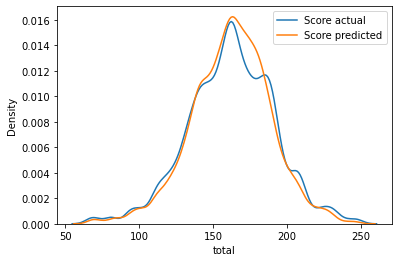

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(y_test,label='Score actual')
sns.kdeplot(y_pred,label='Score predicted')
plt.legend()